In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv("churn_clean.csv")
data

CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef964785f41a2959829830fb8a   West Branch    MI   
2     f1784cfa9f6d92ae816197eb175d3c71       Yamhill    OR   
3     dc8a365077241bb5cd5ccd305136b05e       Del Mar    CA   
4     aabb64a116e83fdc4befc1fbab1663f9     Needville    TX   
...                                ...           ...   ...   
9995  9499fb4de537af195d16d046b79fd20a   Mount Holly    VT   
9996  c09a841117fa81b5c8e19afec2760104   Clarksville    TN   
9997  9c41f212d1e04dca84445019bbc9b41c      Mobeetie    TX   
9998  3e1f269b40c235a1038863ecf6b7a0df    Carrollton    GA   
9999  0ea683a03a3cd544aefe8388aab16176  Clarkesville    GA   

                     County    Zip       Lat        Lng  ...  OnlineBackup  \
0     Prince of Wales-Hyder  99927  56.25100 -133.37571  ...           Yes   
1                    Ogemaw  48661  44.32893  -84.24080  ...            No   
2                   Yamhill  97148  45.35589 -123.24657  ...            No   
3                 San Diego  92014  32.96687 -117.24798  ...            No   
4                 Fort Bend  77461  29.38012  -95.80673  ...            No   
...                     ...    ...       ...        ...  ...           ...   
9995                Rutland   5758  43.43391  -72.78734  ...           Yes   
9996             Montgomery  37042  36.56907  -87.41694  ...           Yes   
9997                Wheeler  79061  35.52039 -100.44180  ...           Yes   
9998                Carroll  30117  33.58016  -85.13241  ...            No   
9999              Habersham  30523  34.70783  -83.53648  ...           Yes   

     DeviceProtection TechSupport StreamingTV  StreamingMovies  \
0                  No          No          No              Yes   
1                  No          No         Yes              Yes   
2                  No          No          No              Yes   
3                  No          No         Yes               No   
4                  No         Yes         Yes               No   
...               ...         ...         ...              ...   
9995              Yes          No          No               No   
9996              Yes          No         Yes               No   
9997               No          No          No               No   
9998               No         Yes         Yes              Yes   
9999              Yes          No          No              Yes   

      PaperlessBilling             PaymentMethod     Tenure MonthlyCharge  \
0                  Yes   Credit Card (automatic)   6.795513    172.455519   
1                  Yes  Bank Transfer(automatic)   1.156681    242.632554   
2                  Yes   Credit Card (automatic)  15.754144    159.947583   
3                  Yes              Mailed Check  17.087227    119.956840   
4                   No              Mailed Check   1.670972    149.948316   
...                ...                       ...        ...           ...   
9995                No          Electronic Check  68.197130    159.979400   
9996                No          Electronic Check  61.040370    207.481100   
9997     

In [11]:
# Function to clean column names
def column_name_remove_space(df):
    for x in df.columns:
        if " " in x:
            df = df.rename(columns={x:x.replace(" ","_").replace("(","")
                                    .replace(")","").replace(",","_").replace("/","_")})
    return df

In [12]:
# Creating a copy of the data frame with existing categorical variables
data_cat = data[['Gender', 'Churn','Techie','Contract','Port_modem', 'Area','Tablet','Phone',
           'OnlineSecurity','Multiple','OnlineBackup','TechSupport','DeviceProtection','StreamingTV',
          'StreamingMovies','PaperlessBilling','PaymentMethod','Marital','InternetService'
            ]].copy()

In [13]:
# Following data columns are not important for data analysis (categorical data, geolocation data etc)
to_drop = ['City','County','Zip','Job','TimeZone',
          'Lat','Lng','UID', 'Customer_id','Interaction','CaseOrder','State','Gender',
          'Churn','Techie','Contract','Port_modem', 'Area','Tablet','Phone',
           'OnlineSecurity','Multiple','OnlineBackup','TechSupport','DeviceProtection','StreamingTV',
          'StreamingMovies','PaperlessBilling','PaymentMethod','Marital','InternetService']
# Fix all columns
data = column_name_remove_space(data)
data.drop(columns=to_drop,inplace=True)

In [14]:
# Check for null values
data.isna().any(axis=0).any()

False

In [15]:
# Checking number of unique values in each column
data.nunique()

Population               5933
Children                   11
Age                        72
Income                   9993
Outage_sec_perweek       9986
Email                      23
Contacts                    8
Yearly_equip_failure        6
Tenure                   9996
MonthlyCharge             750
Bandwidth_GB_Year       10000
dtype: int64

In [16]:
# Check data by printing first few rows
data.head()

Population  Children  Age    Income  Outage_sec_perweek  Email  Contacts  \
0          38         0   68  28561.99            7.978323     10         0   
1       10446         1   27  21704.77           11.699080     12         0   
2        3735         4   50   9609.57           10.752800      9         0   
3       13863         1   48  18925.23           14.913540     15         2   
4       11352         0   83  40074.19            8.147417     16         2   

   Yearly_equip_failure     Tenure  MonthlyCharge  Bandwidth_GB_Year  
0                     1   6.795513     172.455519         904.536110  
1                     1   1.156681     242.632554         800.982766  
2                     1  15.754144     159.947583        2054.706961  
3                     0  17.087227     119.956840        2164.579412  
4                     1   1.670972     149.948316         271.493436

In [17]:
# Check data by printing last few rows
data.tail()

Population  Children  Age    Income  Outage_sec_perweek  Email  \
9995         640         3   23  55723.74            9.415935     12   
9996       77168         4   48  34129.34            6.740547     15   
9997         406         1   48  45983.43            6.590911     10   
9998       35575         1   39  16667.58           12.071910     14   
9999       12230         1   28   9020.92           11.754720     17   

      Contacts  Yearly_equip_failure    Tenure  MonthlyCharge  \
9995         2                     0  68.19713       159.9794   
9996         2                     0  61.04037       207.4811   
9997         0                     0  47.41689       169.9741   
9998         1                     0  71.09560       252.6240   
9999         1                     0  63.35086       217.4840   

      Bandwidth_GB_Year  
9995        6511.252601  
9996        5695.951810  
9997        4159.305799  
9998        6468.456752  
9999        5857.586167

In [18]:
data.to_csv('clean_data.csv')

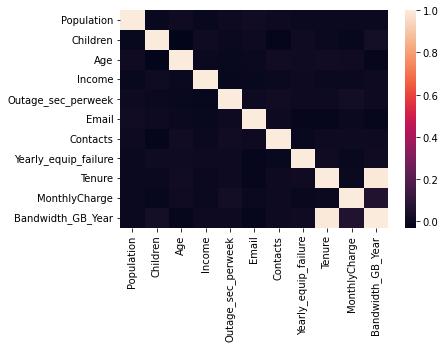

In [19]:
import seaborn as sns
sns.heatmap(data.corr())
plt.show()

In [20]:
# Creating a pipeline to obtain principal components for Elbow rule
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pipe1 = Pipeline([('scaler',StandardScaler()),('reducer',PCA())])
pc = pipe1.fit_transform(data)

In [23]:
pca_data = pd.DataFrame(pc, columns=["PC"+str(i) for i in range(1,12)])
pca_data

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.532639  0.119512 -1.562116  0.136206  0.414997 -1.399578  0.191106   
1    -1.659019  0.130539  0.638301 -1.375658  0.723705 -1.271899  0.575596   
2    -0.900522  1.191402 -0.193081 -0.495760  1.308798 -1.158699 -0.434070   
3    -0.942314 -1.138090  1.264619  0.039044  0.394403  0.898011 -1.516688   
4    -1.929748 -1.434578 -0.984405  1.102943  0.459296  0.611698  0.333212   
...        ...       ...       ...       ...       ...       ...       ...   
9995  1.897402  0.789544  0.484892 -0.372859 -1.157516  1.016570 -0.920543   
9996  1.434856 -1.508304  2.101618  2.366782  0.867436  1.420222  1.171667   
9997  0.578813  0.799305 -0.693559  0.471070 -1.131182 -1.009988 -0.023901   
9998  2.002781 -1.589854  1.860081 -0.311399  0.216009 -0.461117  0.605280   
9999  1.551767 -0.898844  2.112172 -0.290109 -0.341160 -0.632862 -0.120582   

           PC8       PC9      PC10      PC11  
0    -0.130913 -0.527627  0.045657 -0.026622  
1     0.474031 -0.826669  1.302704 -0.038360  
2    -0.004835  0.466449 -0.297649  0.060825  
3    -0.434394 -0.730167 -0.734906  0.130009  
4    -1.448501 -0.347708  0.279139 -0.056541  
...        ...       ...       ...       ...  
9995 -0.197212  0.091115  0.591052  0.081237  
9996  2.015353  1.829908  1.784128 -0.026353  
9997  0.482031 -0.303914  0.032670 -0.086949  
9998  1.201074 -0.039065  1.045767 -0.069400  
9999 -0.414292 -0.790223  0.927587 -0.033821  

[10000 rows x 11 columns]

In [24]:
pca_data.to_csv("pca_data.csv")

In [25]:
variances_value = pipe1.steps[1][1].explained_variance_
variances_value

array([1.99436896, 1.05744462, 1.02956846, 1.01874438, 1.00339009,
       0.9980171 , 0.9915275 , 0.97889558, 0.96418654, 0.9594893 ,
       0.00546758])

In [26]:
# Obtained variances for scree plot
variances = pipe1.steps[1][1].explained_variance_ratio_*100
variances

array([18.12881387,  9.61217163,  9.35877726,  9.26038639,  9.12081587,
        9.07197542,  9.01298502,  8.89816086,  8.76445567,  8.72175774,
        0.04970028])

In [27]:
# Cumulative sum of variances
cumulatives = np.cumsum(variances)
cumulatives

array([ 18.12881387,  27.74098549,  37.09976275,  46.36014914,
        55.48096502,  64.55294043,  73.56592545,  82.46408631,
        91.22854198,  99.95029972, 100.        ])

In [28]:
pca_variances = pd.DataFrame({"Variance":variances_value, "Ratio":variances,"Cumulatives":cumulatives}, index=["PC"+str(i) for i in range(1,12)])
pca_variances

Variance      Ratio  Cumulatives
PC1   1.994369  18.128814    18.128814
PC2   1.057445   9.612172    27.740985
PC3   1.029568   9.358777    37.099763
PC4   1.018744   9.260386    46.360149
PC5   1.003390   9.120816    55.480965
PC6   0.998017   9.071975    64.552940
PC7   0.991528   9.012985    73.565925
PC8   0.978896   8.898161    82.464086
PC9   0.964187   8.764456    91.228542
PC10  0.959489   8.721758    99.950300
PC11  0.005468   0.049700   100.000000

In [29]:
pca_variances.to_csv("pca_variances.csv")

In [30]:
# Components
pd.DataFrame(pipe1.steps[1][1].components_, columns=["PC"+str(i) for i in range(1,12)])

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -0.006007  0.014172  0.001643  0.004414  0.005850 -0.020887  0.004148   
1  -0.275637  0.517059 -0.457819  0.254938 -0.212600 -0.195432 -0.427624   
2   0.267636  0.343248 -0.418590 -0.268952  0.336483  0.526029 -0.107344   
3   0.422474 -0.076204  0.198972 -0.077133 -0.587558  0.311468 -0.162242   
4   0.394930  0.164533  0.126614 -0.318506  0.345667 -0.045059 -0.123928   
5   0.243871  0.164376 -0.087791  0.641985  0.197563  0.135906  0.587837   
6   0.175784  0.180459  0.343081  0.484459 -0.116979  0.308044 -0.376069   
7   0.614035 -0.184798 -0.203859  0.182477  0.098387 -0.597955 -0.245083   
8   0.138379  0.672256  0.273259 -0.254842 -0.285041 -0.325796  0.366164   
9   0.177040 -0.188740 -0.563400 -0.100837 -0.482900  0.092556  0.287739   
10 -0.000347 -0.021587  0.022369 -0.000938  0.000283  0.000252 -0.000941   

         PC8       PC9      PC10      PC11  
0   0.017593  0.705405  0.040448  0.706903  
1   0.169549 -0.006554 -0.294988  0.004457  
2  -0.385120 -0.007865  0.112548  0.022426  
3  -0.135015  0.048500 -0.530093  0.005448  
4   0.729850  0.000291 -0.172686 -0.010287  
5   0.071878  0.009174 -0.292148 -0.000323  
6   0.158048 -0.030141  0.555192  0.000707  
7  -0.277655 -0.007482  0.097520  0.000009  
8  -0.159744 -0.027041  0.203935 -0.001471  
9   0.372774 -0.027774  0.375603  0.009216  
10 -0.000097 -0.705263 -0.045756  0.706783

In [31]:
data.columns

Index(['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')

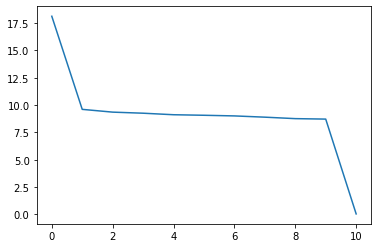

In [32]:
# Scree plot, elbow rule
plt.plot(variances)
plt.show()

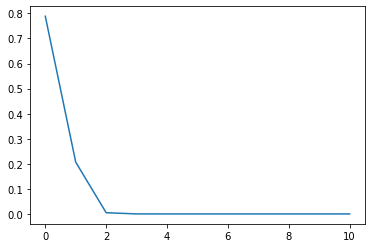

In [33]:
# Applying PCA without normalization can give highly flawed results
# Here it without normalization, it looks like the first component accounts for close
# to 80% variability in the data

pipe1x = Pipeline([('reducer',PCA())])
pcx = pipe1x.fit_transform(data)
plt.plot(pipe1x.steps[0][1].explained_variance_ratio_)
plt.show()

In [34]:
# Component coffecient have a big range of orders of magnitude
# Never use PCA without normalization or Standardization of the field values

pipe1x.steps[0][1].components_

array([[-5.99005974e-03,  7.58413006e-07, -3.02634402e-06,
         9.99982018e-01, -1.05815912e-06, -1.00031684e-06,
         4.27949783e-08,  1.22614065e-07,  2.01348711e-06,
        -4.56514519e-06,  2.87313902e-04],
       [ 9.99981879e-01, -8.57420609e-07,  1.50481503e-05,
         5.99023074e-03,  1.10650311e-06,  3.74358614e-06,
         2.76227736e-07, -1.94798546e-07, -6.64119698e-06,
        -1.43398385e-05, -5.98038349e-04],
       [ 5.99804072e-04,  2.50745353e-05, -1.38883968e-04,
        -2.83724386e-04,  5.76624160e-06, -2.00407887e-05,
         1.49719506e-06,  3.49084852e-06,  1.19967625e-02,
         1.18711175e-03,  9.99927101e-01],
       [ 1.35051852e-05, -5.36199003e-04,  6.85071749e-03,
         4.94974110e-06,  1.41123828e-03,  2.08042615e-04,
         9.55763407e-05, -1.16956715e-04, -3.91845242e-02,
         9.99207078e-01, -7.15180667e-04],
       [-1.50646796e-05, -3.22070670e-03,  9.99085695e-01,
         2.92989076e-06, -1.22563560e-03,  1.66068962e-04,
  

In [35]:
# Based on scree plot creating PCA with appropriate number of components
pipe2 = Pipeline([('scaler',StandardScaler()),('reducer',PCA(n_components=2))])
pc = pipe2.fit_transform(data)
cols = data_cat.columns

data_cat['pc1'] = pc[:,0]
data_cat['pc2'] = pc[:,1]
cols

Index(['Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Area', 'Tablet',
       'Phone', 'OnlineSecurity', 'Multiple', 'OnlineBackup', 'TechSupport',
       'DeviceProtection', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Marital', 'InternetService'],
      dtype='object')

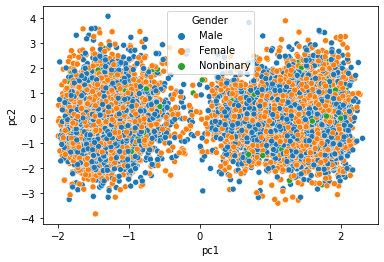

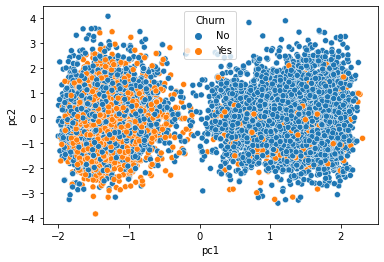

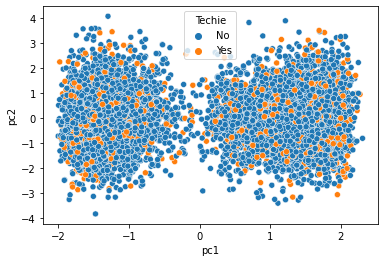

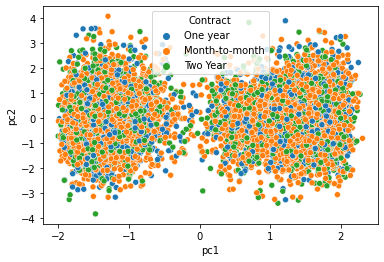

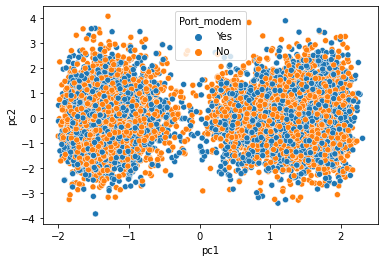

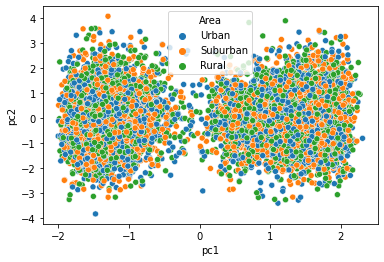

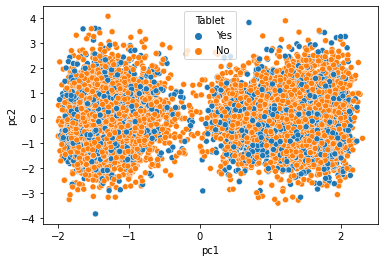

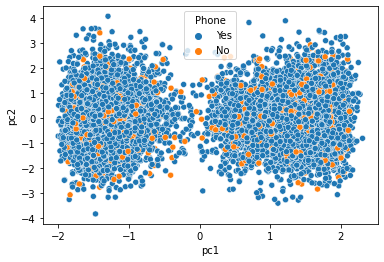

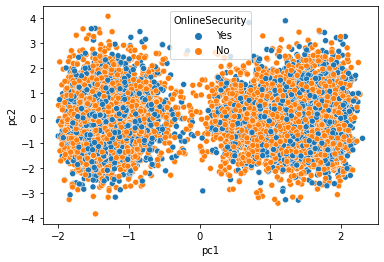

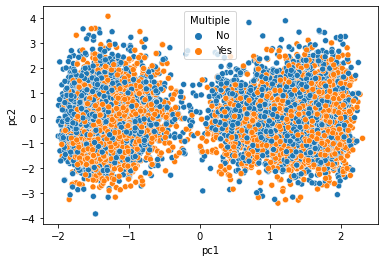

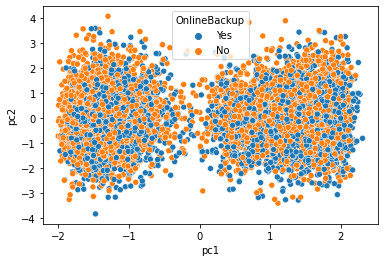

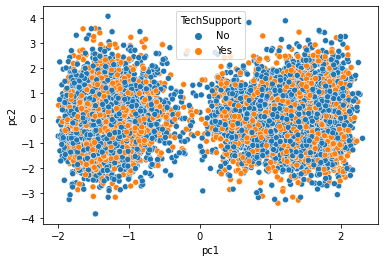

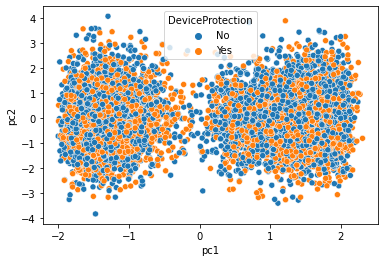

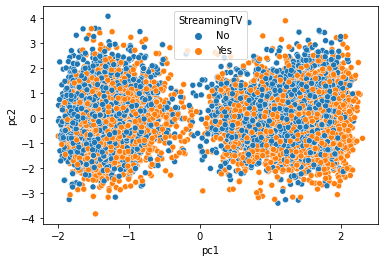

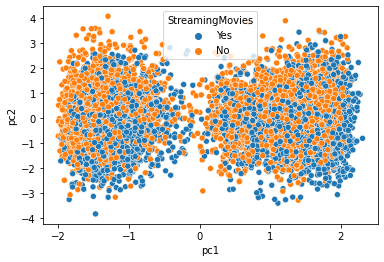

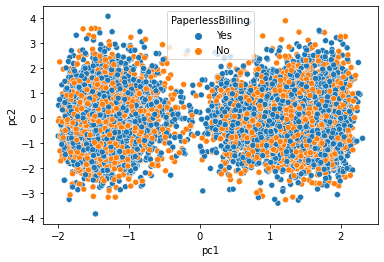

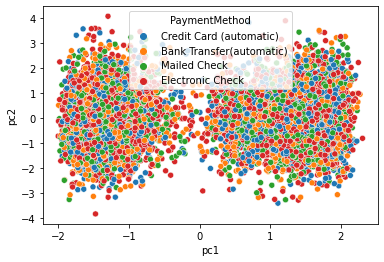

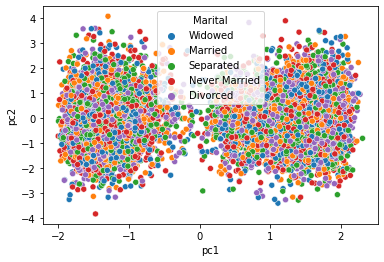

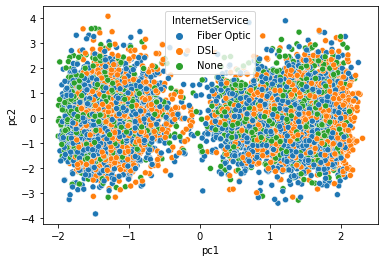

In [36]:
# Creating plots for principal components, colored (legend) based on the other categorical variables
for col in cols:
    sns.scatterplot(data=data_cat, x='pc1',y='pc2',hue=col)
    plt.show()

In [37]:
# Creating train and test split data 

from sklearn.model_selection import train_test_split
y = data_cat['Churn'].apply(lambda x:1 if x=='Yes' else 0) 
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.25)

In [39]:
# Using LogisticRegression along with PCA to compute churn prediction accuracy
from sklearn.linear_model import LogisticRegression

for i in range(2,12):
    pipe2 = Pipeline([('scaler',StandardScaler()), ('reducer',PCA(n_components=i)), ('classifier',LogisticRegression())])
    pipe2.fit(X_train, y_train)
    print(i, pipe2.score(X_test, y_test))

2 0.702
3 0.7728
4 0.7752
5 0.784
6 0.7992
7 0.802
8 0.8096
9 0.82
10 0.824
11 0.8424


In [40]:
# Using LogisticRegression to compute churn prediction accuracy without PCA
pipe4 = Pipeline([('scaler',StandardScaler()), ('classifier',LogisticRegression())])
pipe4.fit(X_train, y_train)
pipe4.score(X_test, y_test)

0.8424

In [41]:
# Using RandomForestClassifier along with PCA to compute churn prediction accuracy
from sklearn.ensemble import RandomForestClassifier

for i in range(2,12):
    pipe5 = Pipeline([('scaler',StandardScaler()), ('reducer',PCA(n_components=i)), ('classifier',RandomForestClassifier())])
    pipe5.fit(X_train, y_train)
    print(i, pipe5.score(X_test, y_test))

2 0.7064
3 0.75
4 0.7648
5 0.7732
6 0.7996
7 0.8012
8 0.81
9 0.8228
10 0.8164
11 0.8324


In [42]:
# Using RandomForestClassifier to compute churn prediction accuracy without PCA
pipe6 = Pipeline([('scaler',StandardScaler()), ('classifier',RandomForestClassifier())])
pipe6.fit(X_train, y_train)
pipe6.score(X_test, y_test)

0.8424

In [43]:
features_importance = pd.DataFrame(
    pipe6[1][1].feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)
features_importance = features_importance.rename({0: "Importancia"}, axis=1)
features_importance[:20]

Importancia
Tenure                   0.305741
MonthlyCharge            0.217757
Bandwidth_GB_Year        0.144504
Income                   0.068355
Outage_sec_perweek       0.062870
Population               0.054998
Age                      0.053127
Children                 0.030843
Email                    0.029621
Contacts                 0.016526
Yearly_equip_failure     0.015659

In [44]:
features_importance.to_csv("features_importance.csv")

In [52]:
data2 = pd.read_csv("churn_clean.csv")
data2

CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef964785f41a2959829830fb8a   West Branch    MI   
2     f1784cfa9f6d92ae816197eb175d3c71       Yamhill    OR   
3     dc8a365077241bb5cd5ccd305136b05e       Del Mar    CA   
4     aabb64a116e83fdc4befc1fbab1663f9     Needville    TX   
...                                ...           ...   ...   
9995  9499fb4de537af195d16d046b79fd20a   Mount Holly    VT   
9996  c09a841117fa81b5c8e19afec2760104   Clarksville    TN   
9997  9c41f212d1e04dca84445019bbc9b41c      Mobeetie    TX   
9998  3e1f269b40c235a1038863ecf6b7a0df    Carrollton    GA   
9999  0ea683a03a3cd544aefe8388aab16176  Clarkesville    GA   

                     County    Zip       Lat        Lng  ...  OnlineBackup  \
0     Prince of Wales-Hyder  99927  56.25100 -133.37571  ...           Yes   
1                    Ogemaw  48661  44.32893  -84.24080  ...            No   
2                   Yamhill  97148  45.35589 -123.24657  ...            No   
3                 San Diego  92014  32.96687 -117.24798  ...            No   
4                 Fort Bend  77461  29.38012  -95.80673  ...            No   
...                     ...    ...       ...        ...  ...           ...   
9995                Rutland   5758  43.43391  -72.78734  ...           Yes   
9996             Montgomery  37042  36.56907  -87.41694  ...           Yes   
9997                Wheeler  79061  35.52039 -100.44180  ...           Yes   
9998                Carroll  30117  33.58016  -85.13241  ...            No   
9999              Habersham  30523  34.70783  -83.53648  ...           Yes   

     DeviceProtection TechSupport StreamingTV  StreamingMovies  \
0                  No          No          No              Yes   
1                  No          No         Yes              Yes   
2                  No          No          No              Yes   
3                  No          No         Yes               No   
4                  No         Yes         Yes               No   
...               ...         ...         ...              ...   
9995              Yes          No          No               No   
9996              Yes          No         Yes               No   
9997               No          No          No               No   
9998               No         Yes         Yes              Yes   
9999              Yes          No          No              Yes   

      PaperlessBilling             PaymentMethod     Tenure MonthlyCharge  \
0                  Yes   Credit Card (automatic)   6.795513    172.455519   
1                  Yes  Bank Transfer(automatic)   1.156681    242.632554   
2                  Yes   Credit Card (automatic)  15.754144    159.947583   
3                  Yes              Mailed Check  17.087227    119.956840   
4                   No              Mailed Check   1.670972    149.948316   
...                ...                       ...        ...           ...   
9995                No          Electronic Check  68.197130    159.979400   
9996                No          Electronic Check  61.040370    207.481100   
9997     

In [53]:
data2 = column_name_remove_space(data2)
# Check for null values
data2.isna().any(axis=0).any()

False

In [54]:
data2

CaseOrder Customer_id                           Interaction  \
0             1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1             2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2             3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3             4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4             5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...         ...         ...                                   ...   
9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                   UID          City State  \
0     e885b299883d4f9fb18e39c75155d990   Point Baker    AK   
1     f2de8bef964785f41a2959829830fb8a   West Branch    MI   
2     f1784cfa9f6d92ae816197eb175d3c71       Yamhill    OR   
3     dc8a365077241bb5cd5ccd305136b05e       Del Mar    CA   
4     aabb64a116e83fdc4befc1fbab1663f9     Needville    TX   
...                                ...           ...   ...   
9995  9499fb4de537af195d16d046b79fd20a   Mount Holly    VT   
9996  c09a841117fa81b5c8e19afec2760104   Clarksville    TN   
9997  9c41f212d1e04dca84445019bbc9b41c      Mobeetie    TX   
9998  3e1f269b40c235a1038863ecf6b7a0df    Carrollton    GA   
9999  0ea683a03a3cd544aefe8388aab16176  Clarkesville    GA   

                     County    Zip       Lat        Lng  ...  OnlineBackup  \
0     Prince of Wales-Hyder  99927  56.25100 -133.37571  ...           Yes   
1                    Ogemaw  48661  44.32893  -84.24080  ...            No   
2                   Yamhill  97148  45.35589 -123.24657  ...            No   
3                 San Diego  92014  32.96687 -117.24798  ...            No   
4                 Fort Bend  77461  29.38012  -95.80673  ...            No   
...                     ...    ...       ...        ...  ...           ...   
9995                Rutland   5758  43.43391  -72.78734  ...           Yes   
9996             Montgomery  37042  36.56907  -87.41694  ...           Yes   
9997                Wheeler  79061  35.52039 -100.44180  ...           Yes   
9998                Carroll  30117  33.58016  -85.13241  ...            No   
9999              Habersham  30523  34.70783  -83.53648  ...           Yes   

     DeviceProtection TechSupport StreamingTV  StreamingMovies  \
0                  No          No          No              Yes   
1                  No          No         Yes              Yes   
2                  No          No          No              Yes   
3                  No          No         Yes               No   
4                  No         Yes         Yes               No   
...               ...         ...         ...              ...   
9995              Yes          No          No               No   
9996              Yes          No         Yes               No   
9997               No          No          No               No   
9998               No         Yes         Yes              Yes   
9999              Yes          No          No              Yes   

      PaperlessBilling             PaymentMethod     Tenure MonthlyCharge  \
0                  Yes   Credit Card (automatic)   6.795513    172.455519   
1                  Yes  Bank Transfer(automatic)   1.156681    242.632554   
2                  Yes   Credit Card (automatic)  15.754144    159.947583   
3                  Yes              Mailed Check  17.087227    119.956840   
4                   No              Mailed Check   1.670972    149.948316   
...                ...                       ...        ...           ...   
9995                No          Electronic Check  68.197130    159.979400   
9996                No          Electronic Check  61.040370    207.481100   
9997     

In [55]:
data2.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year'],
      dtype='object')

In [58]:
data2["Population"]

0          38
1       10446
2        3735
3       13863
4       11352
        ...  
9995      640
9996    77168
9997      406
9998    35575
9999    12230
Name: Population, Length: 10000, dtype: int64

In [56]:
y2 = data2['Churn'].apply(lambda x:1 if x=='Yes' else 0)
data2 = data2.drop("Churn", axis=1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2, y2, test_size = 0.25)

In [ ]:
pd.

In [57]:
# Using RandomForestClassifier to compute churn prediction accuracy without PCA
pipe7 = RandomForestClassifier()
pipe7.fit(X_train2, y_train2)
pipe7.score(X_test2, y_test2)

ValueError: could not convert string to float: 'H17292'

In [51]:
features_importance = pd.DataFrame(
    pipe6[1][1].feature_importances_, index=X_train.columns).sort_values(by=0, ascending=False)
features_importance = features_importance.rename({0: "Importancia"}, axis=1)
features_importance[:20]

Importancia
Tenure                   0.305741
MonthlyCharge            0.217757
Bandwidth_GB_Year        0.144504
Income                   0.068355
Outage_sec_perweek       0.062870
Population               0.054998
Age                      0.053127
Children                 0.030843
Email                    0.029621
Contacts                 0.016526
Yearly_equip_failure     0.015659